In [1]:
#Elizabeth Pieters
#PHYS 412 HW 1 Problem 4

In [2]:
import numpy as np
import matplotlib.pyplot as mpl
from scipy.integrate import quad

eps0 = 8.8541878128*10**(-12) #F/m

In [3]:
def ring(theta, z, R, sig):  #body of the integral that we'll evaluate and stitch together
     return sig*R**2/(2*eps0)*np.sin(theta)*(z - R*np.cos(theta)) / (R**2 + z**2 - 2*R*z*np.cos(theta))**(3/2)

# def ring_coeff(sig, R):      #coefficient that we need to multiply the end result by
#     return sig*R**2/(2*eps0)

def sphere_field_true(z, R):
    if z <= R:
        return 0
    else:
        return 1/(4*np.pi*eps0)*(4*np.pi*R**2*sig)/(z**2)
    
    
#simpsons integrator - essentially fits parabola to groups of 3 points
def simpsons(dx, y):
    return (y[0]+y[-1]+4*np.sum(y[1::2])+2*np.sum(y[2:-1:2]))*dx/3.0


/home/elizabeth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


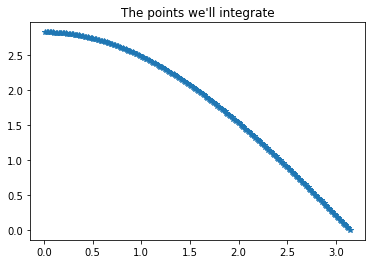

simpsons : nan
true : 0
scipy quad  (5.647045336865342, 6.269479754090026e-14)


In [4]:
#try generating the points of the ring

z = 5
R = 5
sig = 10**(-10)

int_pts = 211                             #number of points to integrate over, MUST BE ODD
thetas = np.linspace(0, np.pi, int_pts)  #generate the thetas to evaluate the disk at
dtheta = thetas[1] - thetas[0]
ring_points = np.zeros(int_pts)     #generate the ring points

for ii, theta in enumerate(thetas):
    ring_points[ii] = ring(theta, z, R, sig)
    
mpl.figure()
mpl.plot(thetas, ring_points, '*-')
mpl.title('The points we\'ll integrate')
mpl.show()

print('simpsons :', simpsons(dtheta, ring_points))#*ring_coeff(sig, R))
print('true :', sphere_field_true(z, R))
print('scipy quad ', quad(ring, a=0, b=np.pi, args=(z, R, sig)))



/home/elizabeth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


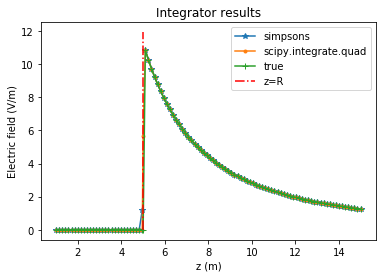

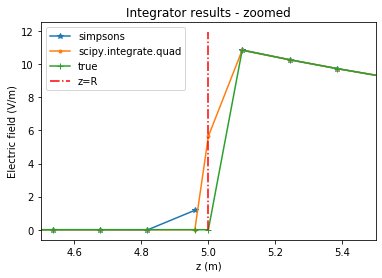

In [9]:
R = 5
sig = 10**(-10)

int_pts = 211                             #number of points to integrate over, MUST BE ODD
thetas = np.linspace(0, np.pi, int_pts)  #generate the thetas to evaluate the disk at
dtheta = thetas[1] - thetas[0]
ring_points = np.zeros(int_pts)     #generate the ring points

z_pts = 100 #will be one extra
zs = np.sort(np.append(np.linspace(1, 3*R, z_pts), R)) #make sure that R is a point
simps = np.zeros(z_pts+1)
trues = np.zeros(z_pts+1)
quads = np.zeros(z_pts+1)

for jj, z in enumerate(zs):
    
    for ii, theta in enumerate(thetas):         #re-generate the ring_points for the new z
        ring_points[ii] = ring(theta, z, R, sig)
    
    simps[jj] = simpsons(dtheta, ring_points)
    trues[jj] = sphere_field_true(z, R)
    quads[jj] = quad(ring, a=0, b=np.pi, args=(z, R, sig))[0]
    
mpl.figure()
mpl.plot(zs, simps, '*-')
mpl.plot(zs, quads, '.-')
mpl.plot(zs, trues, '+-')
mpl.plot([R, R], [0, max(trues)*1.1], 'r-.')
mpl.legend(['simpsons', 'scipy.integrate.quad', 'true', 'z=R'])
mpl.xlabel('z (m)')
mpl.ylabel('Electric field (V/m)')
mpl.title('Integrator results')
mpl.show()

mpl.figure()
mpl.plot(zs, simps, '*-')
mpl.plot(zs, quads, '.-')
mpl.plot(zs, trues, '+-')
mpl.plot([R, R], [0, max(trues)*1.1], 'r-.')
mpl.legend(['simpsons', 'scipy.integrate.quad', 'true', 'z=R'])
mpl.xlabel('z (m)')
mpl.ylabel('Electric field (V/m)')
mpl.title('Integrator results - zoomed')
mpl.xlim([4.5, 5.5])
mpl.show()

Yes, there is a singularity in the integral at z=R. Quad doesn't get too fussed, it simply adds in a point between the two neighbouring points, which at least is non-infinite. My integrator, which uses the simpsons rule, blows up and returns NAN because of the singularity. Why? The simpsons rule is simply adding together the calculated points, and for z=R, one of them is NAN, so the whole integral becomes NAN.